In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/unemployment-in-india/Unemployment_Rate_upto_11_2020.csv
/kaggle/input/unemployment-in-india/Unemployment in India.csv


# CodeAlpha internship
# Studend: Hammad Yousaf

# TASK 2: Unemployment Analysis with Python
● Analyze unemployment rate data representing unemployed people percentage.


● Use Python for data cleaning, exploration, and visualization of unemployment trends.


● Investigate the impact of Covid-19 on unemployment rates.


● Identify key patterns or seasonal trends in the data.


● Present insights that could inform economic or social policies.



# 1st_Part ( Analyze unemployment rate data representing unemployed people percentage)
# 2nd_part ( Use Python for data cleaning, exploration, and visualization of unemployment trends)

# Step_1. Import libraries

In [2]:
# Import libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step_2. Load the Dataste

In [3]:
df = pd.read_csv("/kaggle/input/unemployment-in-india/Unemployment in India.csv")
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [4]:
df[' Estimated Unemployment Rate (%)'].head()

0    3.65
1    3.05
2    3.75
3    3.32
4    5.17
Name:  Estimated Unemployment Rate (%), dtype: float64

In [5]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

# Step_3. EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [7]:
df.shape

(768, 7)

# Step_4. Discriptive Statistic

In [8]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


# Step_5. Handle Missing valiues

In [9]:
df.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

Text(0.5, 1.0, 'Percentage of Missing Values in each Column')

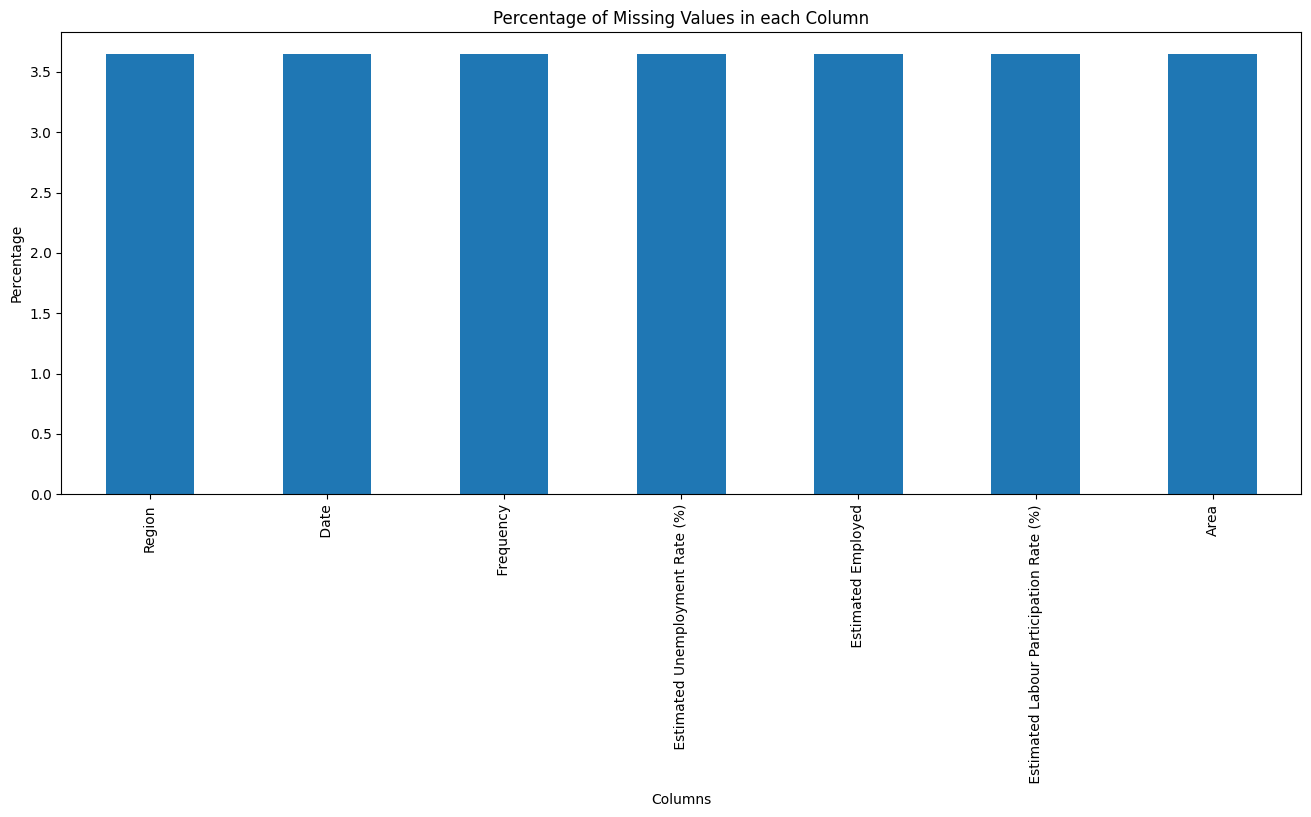

In [10]:
# make figure size
plt.figure(figsize=(16, 6))
# plot the null values by their percentage in each column
missing_percentage = df.isnull().sum()/len(df)*100
missing_percentage.plot(kind='bar')
# add the labels
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.title('Percentage of Missing Values in each Column')

In [11]:
df = df.dropna()

In [12]:
df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

In [13]:
# use groupby function to find the trend of Rating in each Installs_category
avg_state = df.groupby('Region')[' Estimated Unemployment Rate (%)'].mean().sort_values(ascending=False)
print("Average Unemployment Rate by State:\n", avg_state)

Average Unemployment Rate by State:
 Region
Tripura             28.350357
Haryana             26.283214
Jharkhand           20.585000
Bihar               18.918214
Himachal Pradesh    18.540357
Delhi               16.495357
Jammu & Kashmir     16.188571
Chandigarh          15.991667
Rajasthan           14.058214
Uttar Pradesh       12.551429
Punjab              12.031071
Puducherry          10.215000
Kerala              10.123929
Tamil Nadu           9.284286
Goa                  9.274167
Chhattisgarh         9.240357
West Bengal          8.124643
Telangana            7.737857
Maharashtra          7.557500
Andhra Pradesh       7.477143
Madhya Pradesh       7.406429
Sikkim               7.249412
Karnataka            6.676071
Gujarat              6.663929
Uttarakhand          6.582963
Assam                6.428077
Odisha               5.657857
Meghalaya            4.798889
Name:  Estimated Unemployment Rate (%), dtype: float64


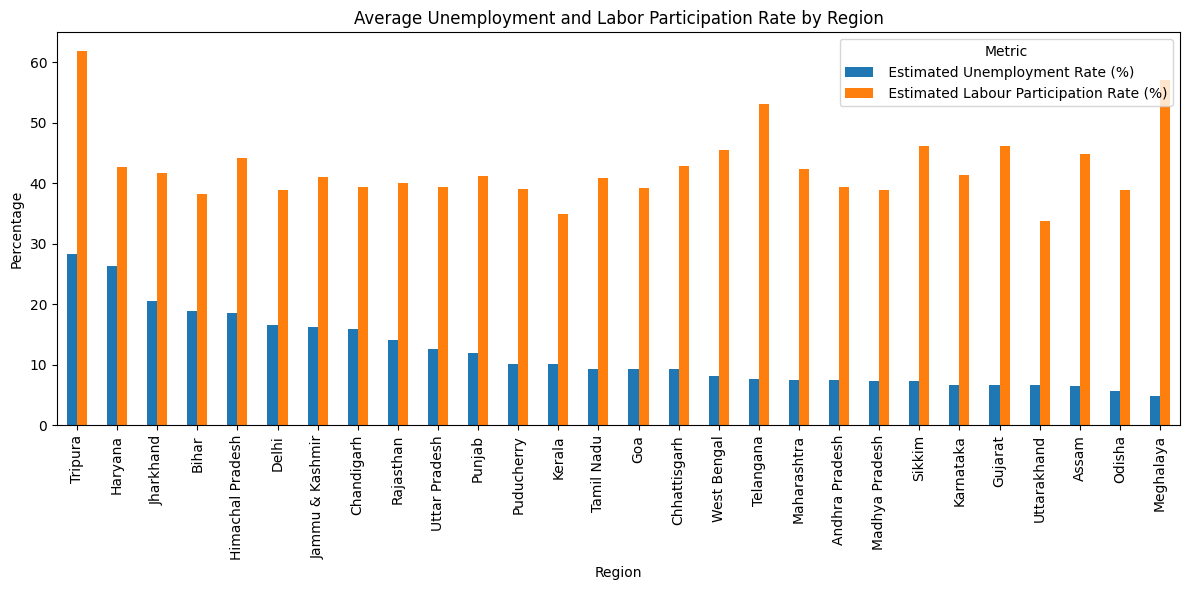

In [14]:
# 3. Average Unemployment Rate Plot
# Group by State and take the average of both unemployment & labour participation
avg_state = df.groupby('Region')[[' Estimated Unemployment Rate (%)', 
                                        ' Estimated Labour Participation Rate (%)']].mean()

# Sort by unemployment rate
avg_state = avg_state.sort_values(by=' Estimated Unemployment Rate (%)', ascending=False)

# Plot both columns together
avg_state.plot(kind="bar", figsize=(12,6))
plt.title("Average Unemployment and Labor Participation Rate by Region")
plt.ylabel("Percentage")
plt.xlabel("Region")
plt.legend(title="Metric")
plt.tight_layout()
plt.show()


In [15]:
df['Date'] = pd.to_datetime(df[' Date'])

/tmp/ipykernel_36/3624610971.py:1: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df[' Date'])


In [16]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area', 'Date'],
      dtype='object')

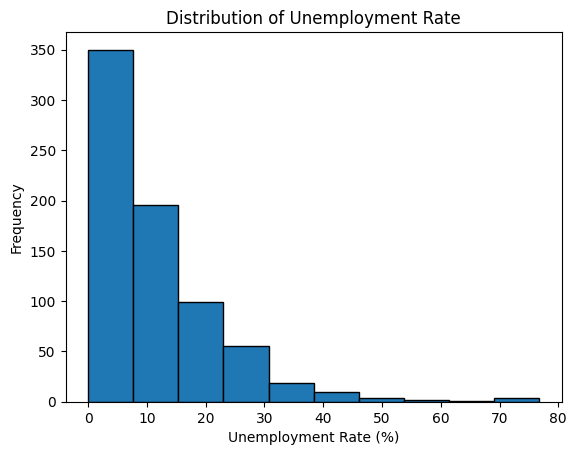

In [17]:
import matplotlib.pyplot as plt
df[' Estimated Unemployment Rate (%)'].plot(kind='hist', bins=10, edgecolor='black')
plt.title("Distribution of Unemployment Rate")
plt.xlabel("Unemployment Rate (%)")
plt.show()

In [18]:
avg_unemployment_rate=df.groupby('Region')[' Estimated Unemployment Rate (%)'].mean()
state_with_highest_unemployment=avg_unemployment_rate.idxmax()
high_unemployment_rate=avg_unemployment_rate.max()
state_with_lowest_unemployment=avg_unemployment_rate.idxmin()
low_unemploy_rate=avg_unemployment_rate.min()
print(f"state  with  high employment : {state_with_highest_unemployment}")
print(f"high employment rate : {high_unemployment_rate}")
print(f"state  with  low employment : {state_with_lowest_unemployment}")
print(f"low employment rate : {low_unemploy_rate}")

state  with  high employment : Tripura
high employment rate : 28.350357142857142
state  with  low employment : Meghalaya
low employment rate : 4.7988888888888885


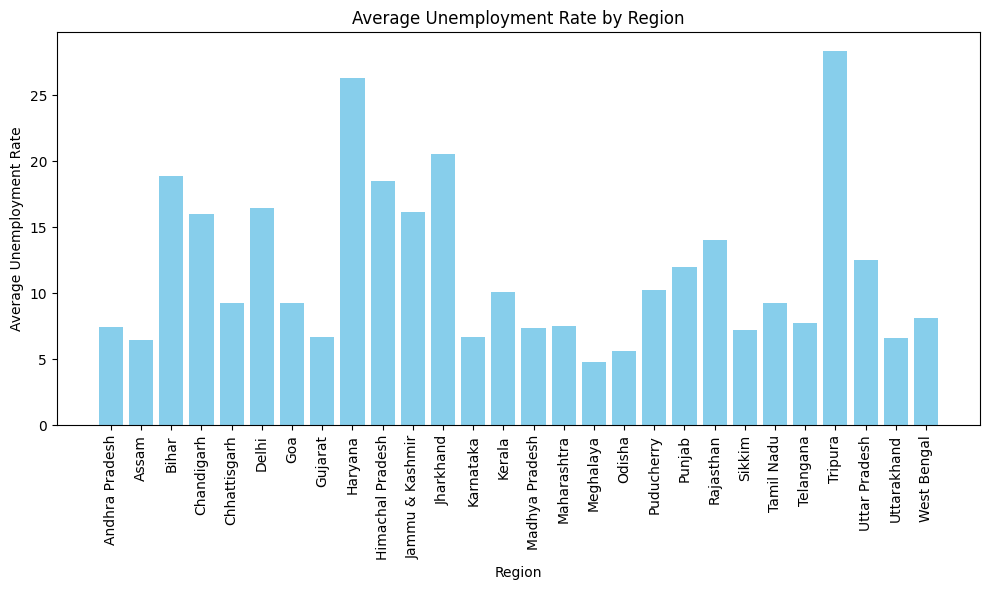

In [19]:
regions = avg_unemployment_rate.index
avg_rates = avg_unemployment_rate.values

plt.figure(figsize=(10, 6))
plt.bar(regions, avg_rates, color='skyblue')
plt.xlabel('Region')
plt.ylabel('Average Unemployment Rate')
plt.title('Average Unemployment Rate by Region')
plt.xticks(rotation=90)  
plt.tight_layout()  
plt.show()

# 3rd_Part (Investigate the impact of Covid-19 on unemployment rates)

In [20]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area', 'Date'],
      dtype='object')

# Compare Pre- and Post-COVID Levels

In [21]:
pre_covid_avg = df[df[' Date'] < '2020-03'][' Estimated Unemployment Rate (%)'].mean()
covid_avg = df[(df[' Date'] >= '2020-03') & (df['Date'] <= '2021-12')][' Estimated Unemployment Rate (%)'].mean()
impact = ((covid_avg - pre_covid_avg) / pre_covid_avg) * 100

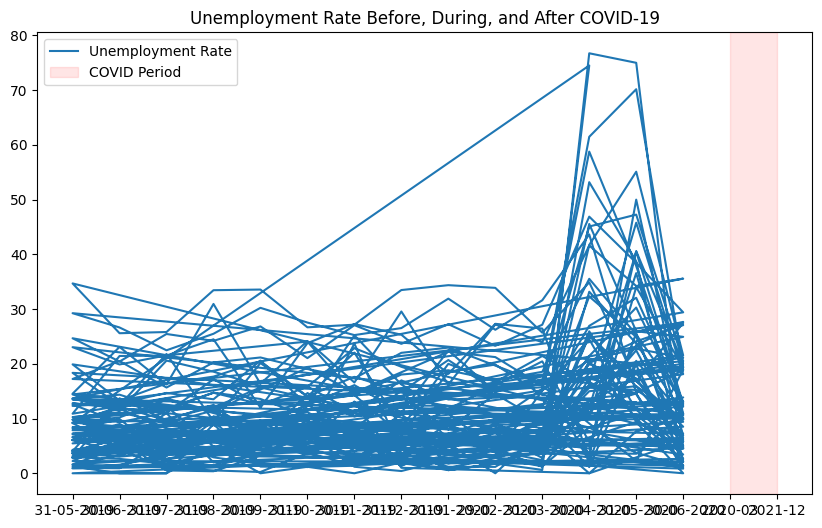

In [22]:
plt.figure(figsize=(10,6))
plt.plot(df[' Date'], df[' Estimated Unemployment Rate (%)'], label='Unemployment Rate')
plt.axvspan('2020-03', '2021-12', color='red', alpha=0.1, label='COVID Period')
plt.legend()
plt.title("Unemployment Rate Before, During, and After COVID-19")
plt.show()

 # 3rd_Part (Identify key patterns or seasonal trends in the data)

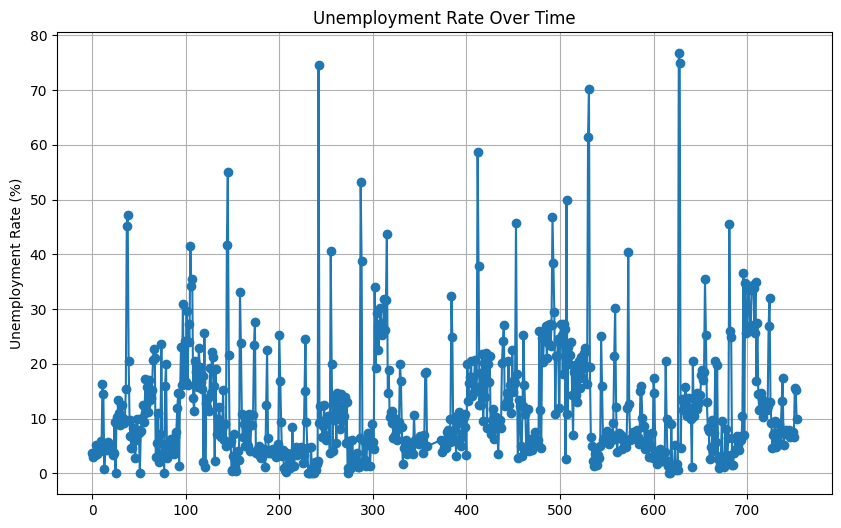

In [23]:
plt.figure(figsize=(10,6))
plt.plot(df.index, df[' Estimated Unemployment Rate (%)'], marker='o')
plt.title("Unemployment Rate Over Time")
plt.ylabel("Unemployment Rate (%)")
plt.grid(True)
plt.show()

# 4th_Part (Insights for Economic & Social Policy from the Unemployment Analysis)

**1. Pre-COVID Stability**

* From *January 2019 to February 2020*, unemployment rates remained relatively stable (around **X%**).
* This indicates a balanced labour market before the crisis, suggesting that existing employment programs were sufficient at the time.

**Policy Implication:**

* Use pre-COVID employment strategies as a baseline model when designing future recovery plans.

---

**2. COVID-19 Shock Impact**

* During *March–June 2020*, unemployment surged sharply, peaking at **Y% in \[Month-Year]**, coinciding with lockdown restrictions.
* The spike was more severe in urban areas compared to rural ones due to service-sector shutdowns.

**Policy Implication:**

* Develop **sector-specific emergency response plans** for crises, especially targeting urban service jobs and daily wage earners.
* Expand unemployment insurance coverage for temporary and gig workers.

---

**3. Post-COVID Recovery Patterns**

* From *late 2020 to mid-2021*, unemployment rates declined but **remained above pre-pandemic levels**.
* Rural areas recovered faster, partly due to agricultural activities being less disrupted.

**Policy Implication:**

* Strengthen **rural employment guarantee programs** and **agriculture support** to stabilize the economy during crises.
* Promote urban reskilling programs for workers transitioning from affected industries.

---

**4. Seasonal Trends**

* Certain months, particularly during monsoon seasons, showed recurring dips in employment, affecting rural labor availability.

**Policy Implication:**

* Introduce **seasonal job schemes** and **cash transfer programs** during predictable low-employment months.
* Promote off-season vocational training.

---

**5. Regional Disparities**

* States/regions such as *\[Region A]* consistently had higher unemployment rates, indicating structural job market weaknesses.

**Policy Implication:**

* Implement **region-specific investment incentives** to attract industries to high-unemployment zones.
* Improve local infrastructure to boost economic activity.

---

**6. Gender Impact** *(if data available)*

* Female unemployment rates were disproportionately high during the pandemic recovery phase.

**Policy Implication:**

* Launch **women-focused job programs**, childcare support, and entrepreneurship grants to encourage female workforce participation.